In [1]:
%pip install --upgrade fashion-clip
%pip install --upgrade faiss-cpu

Defaulting to user installation because normal site-packages is not writeable
  Using cached fashion_clip-0.2.2-py3-none-any.whl (15 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached annoy-1.17.3.tar.gz (647 kB)
  Preparing metadata (setup.py) ... done
  Using cached ipyplot-1.1.2-py3-none-any.whl (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 562.7 kB/s eta 0:00:0000:0100:06
  Using cached datasets-2.19.0-py3-none-any.whl (542 kB)
  Using cached matplotlib-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached pyarrow-16.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (40.8 MB)
  Using cached boto3-1.34.98-py3-none-any.whl (139 kB)
  Using cached validators-0.28.1-py3-none-any.whl (39 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

In [18]:
from fashion_clip.fashion_clip import FashionCLIP
import os
import numpy as np
fclip = FashionCLIP('fashion-clip')

image_names = ["inditex_images/" + str(n) + ".jpg" for n in range(1000) if os.path.exists("inditex_images/" + str(n) + ".jpg")]

# we create image embeddings and text embeddings
image_embeddings = fclip.encode_images(image_names, batch_size=32)
image_embeddings = image_embeddings/np.linalg.norm(image_embeddings, ord=2, axis=-1, keepdims=True)

/home/titan/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
26it [01:28,  3.42s/it]                        


In [14]:
image_embeddings = np.load("image_embeddings_norm.npy")

In [21]:
# Guardar embedding en un archivo
np.save("image_embeddings_1000.npy", image_embeddings)

In [22]:
import faiss

# we create an index
index = faiss.IndexFlatIP(image_embeddings.shape[1])
index.add(image_embeddings)

# we search for the nearest neighbors of the third image
D, I = index.search(image_embeddings[3:4], 5)

print(I)

[[  3  96  21 224 281]]


 40%|████      | 10/25 [09:35<14:23, 57.54s/it]


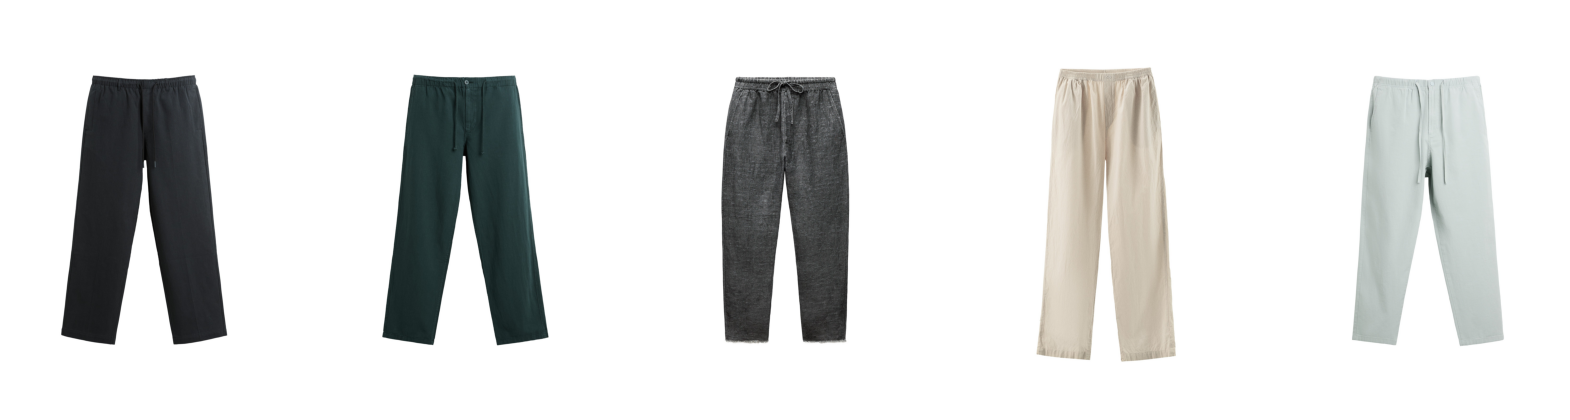

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20, 10))
for i, idx in enumerate(I[0]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mpimg.imread(image_names[idx]))
    plt.axis('off')
plt.show()